In [ ]:
import pandas as pd
from scipy.io import arff
import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
df = pd.read_csv("2016_half.csv", delimiter=',').dropna()

In [ ]:
print(f"Sampled dataset size: {len(df)}")

Sampled dataset size: 3741355


In [ ]:

unique_users = df['user key'].unique()  

# Randomly sample 10% of these users
np.random.seed(42)  # For reproducibility
sampled_users = np.random.choice(unique_users, size=int(len(unique_users) * 0.1), replace=False)

df = df[df['user key'].isin(sampled_users)]


print(f"Sampled dataset size: {len(df)}")

Sampled dataset size: 361712


In [ ]:
df.head()

,Unnamed: 0,user key,datetime,meter reading,diff
79089,351608,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 21:34:42,211134.0,0.0
79090,351609,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 20:34:42,211134.0,0.0
79091,351610,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 19:34:42,211134.0,0.0
79092,351611,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 18:34:42,211134.0,0.0
79093,351612,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 17:34:45,211134.0,0.0


In [ ]:
df = df.drop_duplicates()
print(df.shape[0])

361712


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361712 entries, 79089 to 3731044
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     361712 non-null  int64  
 1   user key       361712 non-null  object 
 2   datetime       361712 non-null  object 
 3   meter reading  361712 non-null  float64
 4   diff           361712 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.6+ MB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['meter reading'] = df['meter reading'].astype('float32')
df['diff'] = df['diff'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361712 entries, 79089 to 3731044
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     361712 non-null  int64         
 1   user key       361712 non-null  object        
 2   datetime       361712 non-null  datetime64[ns]
 3   meter reading  361712 non-null  float32       
 4   diff           361712 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int64(1), object(1)
memory usage: 13.8+ MB


In [ ]:
# Function to categorize part of the day
def get_part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['part_of_day'] = df['datetime'].apply(lambda x: get_part_of_day(x.hour))


# Extract day of the week
df['day_of_week'] = df['datetime'].dt.day_name()

# Display the first few rows to verify
print(df.head())

       Unnamed: 0                              user key            datetime  \
79089      351608  394498ca-90e0-419a-bb06-f700ef43fa15 2016-06-30 21:34:42   
79090      351609  394498ca-90e0-419a-bb06-f700ef43fa15 2016-06-30 20:34:42   
79091      351610  394498ca-90e0-419a-bb06-f700ef43fa15 2016-06-30 19:34:42   
79092      351611  394498ca-90e0-419a-bb06-f700ef43fa15 2016-06-30 18:34:42   
79093      351612  394498ca-90e0-419a-bb06-f700ef43fa15 2016-06-30 17:34:45   

       meter reading  diff part_of_day day_of_week  
79089       211134.0   0.0       Night    Thursday  
79090       211134.0   0.0     Evening    Thursday  
79091       211134.0   0.0     Evening    Thursday  
79092       211134.0   0.0     Evening    Thursday  
79093       211134.0   0.0     Evening    Thursday  


In [ ]:
df_2016 = pd.get_dummies(df, columns=['part_of_day', 'day_of_week'])

df_2016.head(10)

,Unnamed: 0,user key,datetime,meter reading,diff,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
79089,351608,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 21:34:42,211134.0,0.0,False,False,False,True,False,False,False,False,True,False,False
79090,351609,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 20:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False
79091,351610,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 19:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False
79092,351611,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 18:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False
79093,351612,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 17:34:45,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False
79094,351613,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 16:34:45,211134.0,0.0,True,False,False,False,False,False,False,False,True,False,False
79095,351614,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 15:34:45,211134.0,0.0,True,False,False,False,False,False,False,False,True,False,False
79096,351615,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 14:34:45,211134.0,0.0,True,False,False,False,False,False,False,False,True,False,False
79097,351616,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 13:34:43,211134.0,0.0,True,False,False,False,False,False,False,False,True,False,False
79098,351617,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 12:34:43,211134.0,1.0,True,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_2016.columns

Index(['Unnamed: 0', 'user key', 'datetime', 'meter reading', 'diff',
       'part_of_day_Afternoon', 'part_of_day_Evening', 'part_of_day_Morning',
       'part_of_day_Night', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [ ]:
features = ['meter reading', 'diff', 'part_of_day_Afternoon', 'part_of_day_Evening', 'part_of_day_Morning',
       'part_of_day_Night', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday']


In [ ]:
X_scaled = StandardScaler().fit_transform(df_2016[features])

In [ ]:
#np.random.seed(42)
dbscan = DBSCAN(eps=0.1, min_samples=26)
clusters = dbscan.fit_predict(X_scaled)

df_2016['Cluster'] = clusters

anomalies = df_2016[df_2016['Cluster'] == -1]

print("Number of anomalies found:", len(anomalies))



Number of anomalies found: 26731


In [ ]:
unique_clusters = np.unique(clusters)
print("Number of cluster found:", len(unique_clusters))

Number of cluster found: 43


In [ ]:
df_2016

,Unnamed: 0,user key,datetime,meter reading,diff,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,part_of_day_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Cluster
79089,351608,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 21:34:42,211134.0,0.0,False,False,False,True,False,False,False,False,True,False,False,0
79090,351609,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 20:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1
79091,351610,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 19:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1
79092,351611,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 18:34:42,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1
79093,351612,394498ca-90e0-419a-bb06-f700ef43fa15,2016-06-30 17:34:45,211134.0,0.0,False,True,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731040,16809483,2a58ae85-e148-4127-a7bd-567882bbff65,2016-01-01 09:00:41,233876.0,7.0,False,False,True,False,True,False,False,False,False,False,False,27
3731041,16809484,2a58ae85-e148-4127-a7bd-567882bbff65,2016-01-01 08:00:41,233869.0,0.0,False,False,True,False,True,False,False,False,False,False,False,27
3731042,16809485,2a58ae85-e148-4127-a7bd-567882bbff65,2016-01-01 07:00:41,233869.0,0.0,False,False,True,False,True,False,False,False,False,False,False,27
3731043,16809486,2a58ae85-e148-4127-a7bd-567882bbff65,2016-01-01 06:00:41,233869.0,4.0,False,False,True,False,True,False,False,False,False,False,False,27


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

conditions = [
    df_2016['part_of_day_Afternoon'],
    df_2016['part_of_day_Evening'],
    df_2016['part_of_day_Morning'],
    df_2016['part_of_day_Night']
]

choices = ['Afternoon', 'Evening', 'Morning', 'Night']

df_2016['Part of Day'] = np.select(conditions, choices, default='Unknown')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


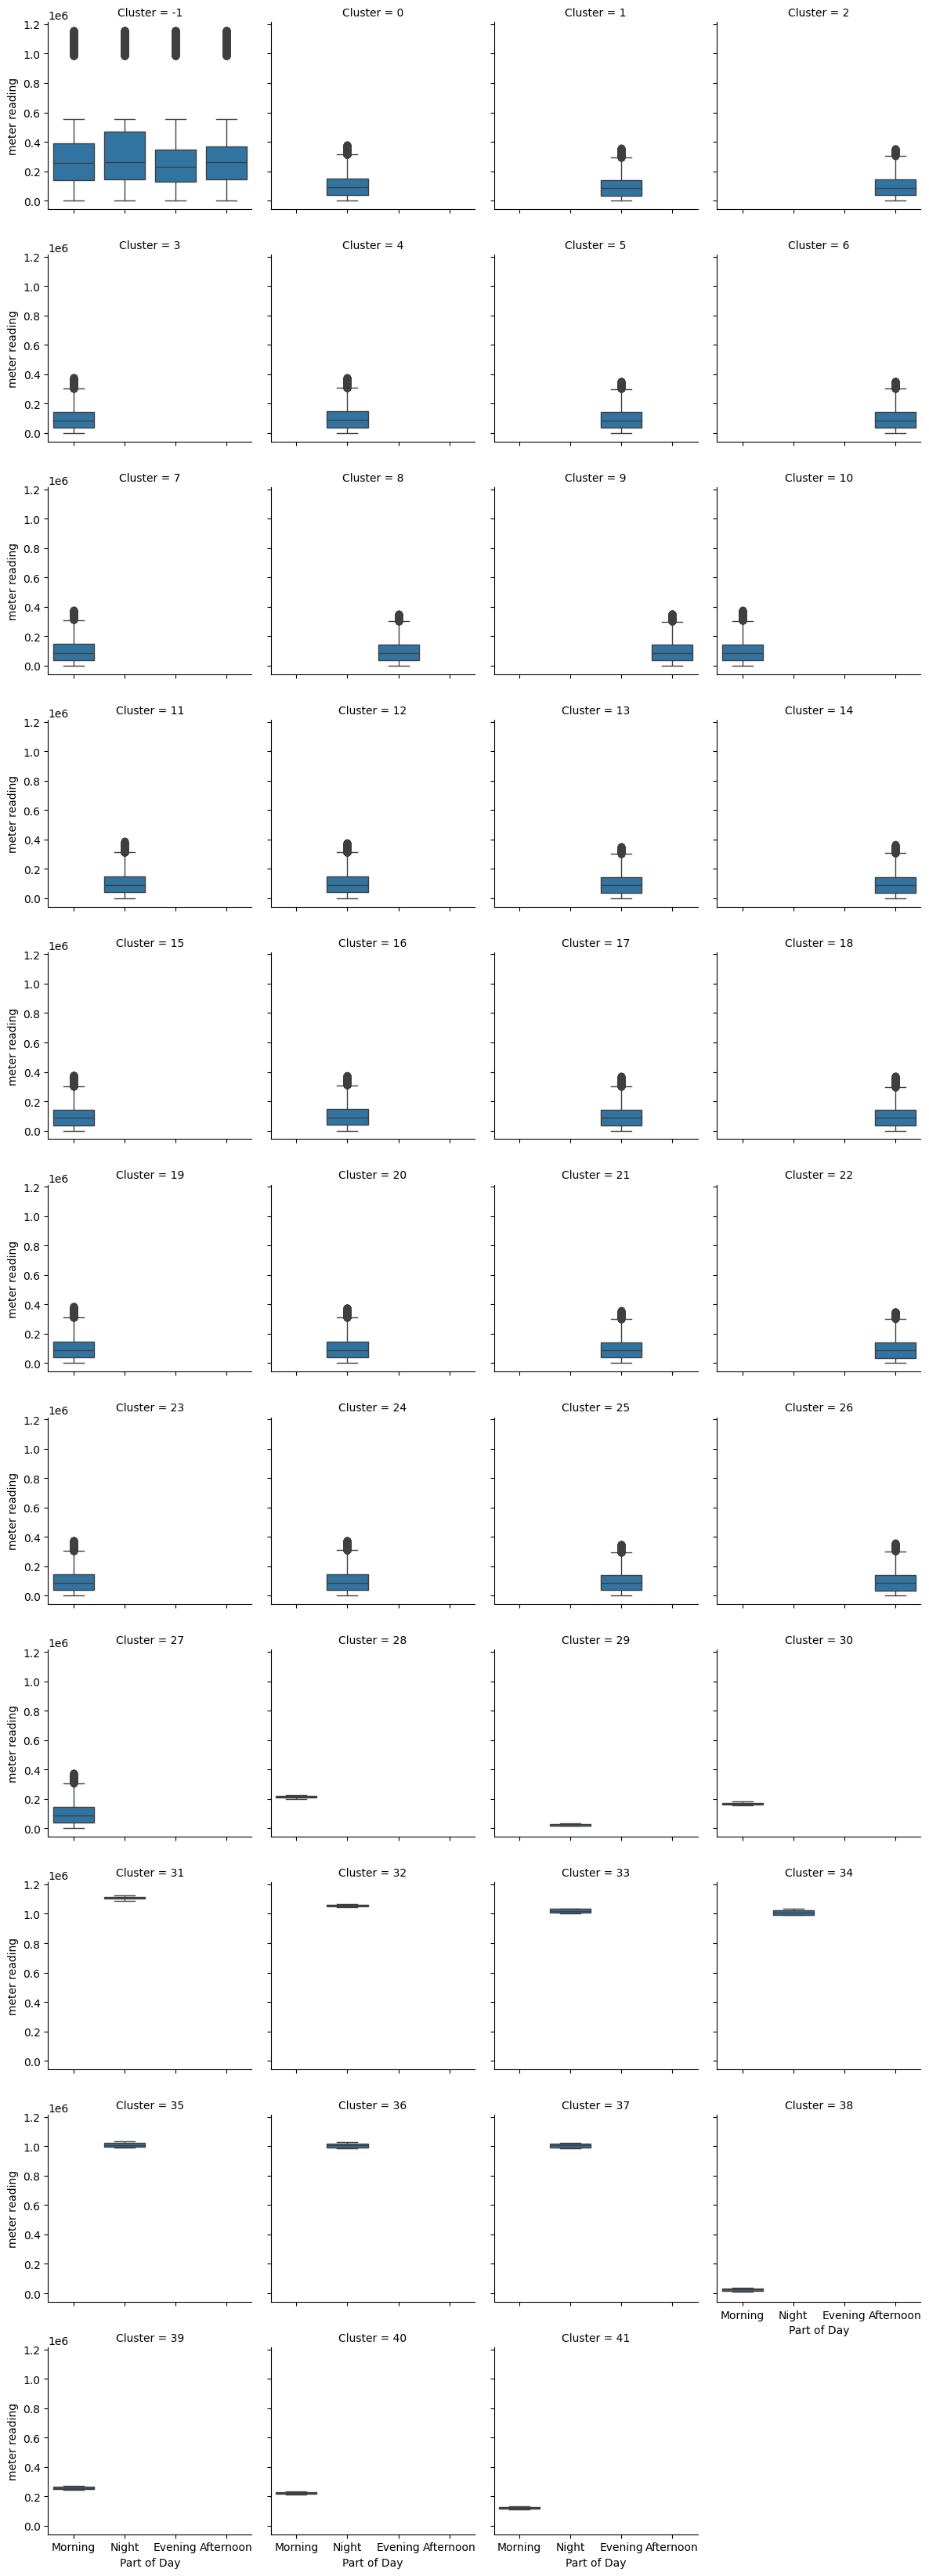

In [ ]:

g = sns.FacetGrid(df_2016, col='Cluster', col_wrap=4, height=3)
g.map(sns.boxplot, 'Part of Day', 'meter reading')
plt.show()


In [ ]:

def find_outliers_iqr(df_2016):
    q1 = df_2016.quantile(0.25)
    q3 = df_2016.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df_2016[(df_2016 < lower_bound) | (df_2016 > upper_bound)]



outliers = df_2016.groupby('Cluster')['meter reading'].apply(find_outliers_iqr).reset_index()
outliers.rename(columns={'level_1': 'original_index'}, inplace=True)


In [ ]:
# label DBSCAN cluster = -1 as Anomaly
df_2016['Anomaly'] = 0
df_2016.loc[df_2016['Cluster'] == -1, 'Anomaly'] = 1

# label outliers as Anomaly as well
outlier_indices = outliers['original_index'].values
df_2016.loc[outlier_indices, 'Anomaly'] = 1


In [ ]:
df_2016['Anomaly'].sum()

32136

In [ ]:
def create_sequences(data, labels, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(
    X_scaled,
    df_2016['Anomaly'].values,
    df_2016[['user key', 'datetime']],
    test_size=0.2,
    random_state=42
)


smote = SMOTE(random_state=42)


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


X_train_smote, y_train_smote = create_sequences(X_train_smote, y_train_smote)
X_test, y_test = create_sequences(X_test, y_test)


print(f"Original class distribution: {sum(y_train == 1)} class 1, {sum(y_train == 0)} class 0")
print(f"SMOTE class distribution: {sum(y_train_smote == 1)} class 1, {sum(y_train_smote == 0)} class 0")
print(df_test.head())

Original class distribution: 25677 class 1, 263692 class 0
SMOTE class distribution: 263691 class 1, 263669 class 0
                                     user key            datetime
2742404  bdd6f63c-8fa3-493b-88af-b4b6962b89b2 2016-01-04 23:37:33
1316501  35e854d3-ea56-4bcb-8441-fac69c1851be 2016-02-21 16:41:19
3526376  b536337c-af2f-4ba9-a935-7552c7230d16 2016-05-19 02:31:24
1566779  50db74f3-973a-48f5-a21e-9a59e7d89f4b 2016-04-11 17:25:58
459074   030eaa66-d10b-4c88-bf4d-bddb394bbc03 2016-06-29 13:21:10


In [ ]:
import pickle


with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)


df_test.to_csv('df_test.csv', index=False)



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import tensorflow as tf
import random


random.seed(42)

np.random.seed(42)

tf.random.set_seed(42)


model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train_smote.shape[1], X_train_smote.shape[2])),
        Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_smote, y_train_smote, epochs =15, batch_size=20, shuffle=True, validation_data=(X_test, y_test), callbacks=[early_stopping])

#save the model
model.save('hybrid_lstm_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - accuracy: 0.9360 - loss: 0.1894 - val_accuracy: 0.9108 - val_loss: 0.3028
Epoch 2/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9517 - loss: 0.1641 - val_accuracy: 0.9107 - val_loss: 0.3018
Epoch 3/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 93s 4ms/step - accuracy: 0.9517 - loss: 0.1638 - val_accuracy: 0.9108 - val_loss: 0.3012
Epoch 4/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9517 - loss: 0.1637 - val_accuracy: 0.9107 - val_loss: 0.3026
Epoch 5/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 95s 4ms/step - accuracy: 0.9517 - loss: 0.1641 - val_accuracy: 0.9107 - val_loss: 0.3019
Epoch 6/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9517 - loss: 0.1640 - val_accuracy: 0.9108 - val_loss: 0.3012
Epoch 7/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9517 - loss: 0.1637 - val_accuracy: 0.9107 - val_loss: 0.3018
Epoch 8/15
26368/26368 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 

Model saved to hybrid_lstm_model.h5


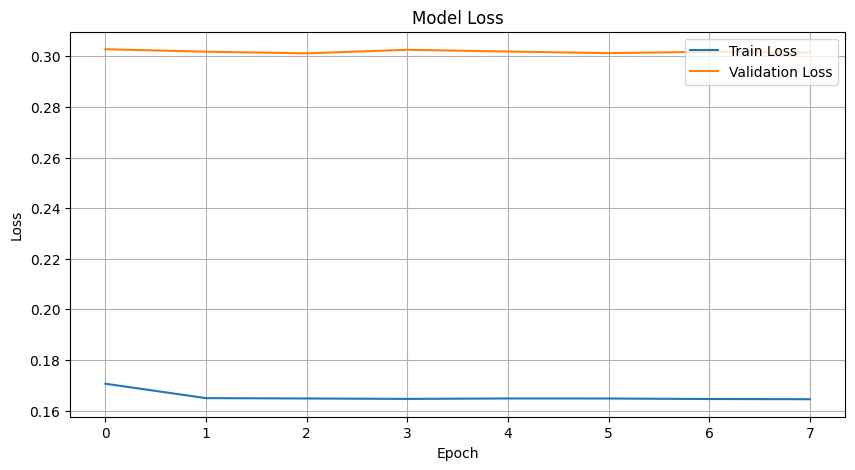

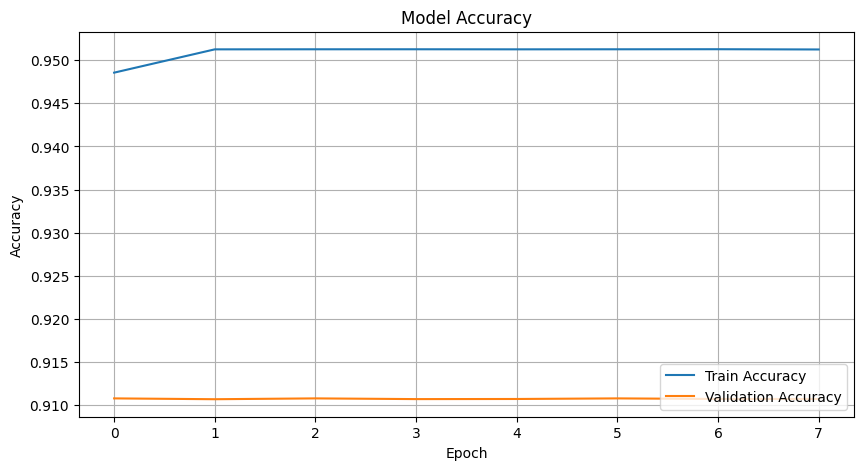

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
